In [1]:
#imports
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
#read data

df = pd.read_csv('../data/datos_TP1_2025.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57510 entries, 0 to 57509
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Estudios_máximos_antes_de_la_inscripción_label  57510 non-null  object
 1   estado_civil_label                              57510 non-null  object
 2   modo_aplicacion_label                           57510 non-null  object
 3   sexo_label                                      57510 non-null  object
 4   desplazado_label                                57510 non-null  object
 5   target_label                                    57510 non-null  object
 6   Carrera                                         57510 non-null  object
 7   Asistencia_diurna/nocturna                      57510 non-null  object
 8   Cualificación_promedio_de_estudios_previos      57510 non-null  int64 
 9   Puntaje_en_examen_de_ingreso                    57

In [3]:
df.head()

Estudios_máximos_antes_de_la_inscripción_label estado_civil_label  \
0                           Educación Secundaria        1 - Soltero   
1                           Educación Secundaria        1 - Soltero   
2                           Educación Secundaria        1 - Soltero   
3                            Superior - Pregrado        1 - Soltero   
4                           Educación Secundaria        1 - Soltero   

             modo_aplicacion_label     sexo_label desplazado_label  \
0                   Acceso General   0 - Femenino           0 - No   
1  Acceso por Normativa Específica   0 - Femenino           1 - Sí   
2  Acceso por Normativa Específica   0 - Femenino           1 - Sí   
3                   Acceso General   0 - Femenino           1 - Sí   
4                   Acceso General  1 - Masculino           1 - Sí   

  target_label                    Carrera Asistencia_diurna/nocturna  \
0     Desertor                    Derecho                 1 - Diurna   
1     En Curso                 Enfermería                 1 - Diurna   
2     Desertor                 Enfermería                 1 - Diurna   
3     Desertor                   Economía                 1 - Diurna   
4     Desertor  Periodismo y Comunicación                 1 - Diurna   

   Cualificación_promedio_de_estudios_previos  Puntaje_en_examen_de_ingreso  \
0                                          66                            65   
1                                          69                            66   
2                                          69                            63   
3                                          68                            68   
4                                          68                            70   

   ... Unidades_curriculares_1er_semestre_(aprobadas)  \
0  ...                                              6   
1  ...                                              7   
2  ...                                              6   
3  ...                                              4   
4  ...                                              5   

  Nota_promedio_en_el_1er_semestre  \
0                               73   
1                               63   
2                               65   
3                               64   
4                               65   

  Unidades_curriculares_2do_semestre_(inscrito)  \
0                                             6   
1                                             8   
2                                             7   
3                                             5   
4                                             6   

  Cantidad_de_evaluaciones_en_el_2do_semestre_  \
0                                            7   
1                                           11   
2                                           12   
3                                            8   
4                                            6   

   Unidades_curriculares_2do_semestre_(aprobadas)  \
0                                               6   
1                                               7   
2                                               6   
3                                               5   
4                                               6   

  Nota_promedio_en_el_2do_semestre     Demanda_Cog_Padre_label  \
0                               62     Demanda cognitiva media   
1                               64  Muy alta demanda cognitiva   
2                               65  Muy baja demanda cognitiva   
3                               66  Muy baja demanda cognitiva   
4                               68     Demanda cognitiva media   

      Demanda_Cog_Madre_label   Ingresos_Padre_label   Ingresos_Madre_label  
0     Demanda cognitiva media  Ingresos medios-bajos  Ingresos medios-bajos  
1  Muy alta demanda cognitiva         Altos ingresos         Altos ingresos  
2  Muy baja demanda cognitiva         Bajos ingresos         Bajos ingresos  
3  Muy baja demanda cognitiva         

In [4]:
# Remover "_label" de todas las columnas que lo tengan
df.columns = [col.replace('_label', '') if col.endswith('_label') else col for col in df.columns]

# EDA

In [5]:
cols_object = df.select_dtypes(include='object').columns
print(cols_object)

Index(['Estudios_máximos_antes_de_la_inscripción', 'estado_civil',
       'modo_aplicacion', 'sexo', 'desplazado', 'target', 'Carrera',
       'Asistencia_diurna/nocturna', 'Necesidades_educativas_especiales',
       'Tiene_deuda', 'Pago_de_matrícula_al_día', 'Poseedor_de_Beca',
       'Estudiante_Internacional', 'Demanda_Cog_Padre', 'Demanda_Cog_Madre',
       'Ingresos_Padre', 'Ingresos_Madre'],
      dtype='object')


In [6]:
# df es tu DataFrame
cols_interger = df.select_dtypes(include='int64').columns
print(cols_interger)

Index(['Cualificación_promedio_de_estudios_previos',
       'Puntaje_en_examen_de_ingreso', 'Edad_al_momento_de_la_inscripción',
       'Unidades_curriculares_1er_semestre_(inscrito)',
       'Cantidad_de_evaluaciones_en_el_1er_semestre',
       'Unidades_curriculares_1er_semestre_(aprobadas)',
       'Nota_promedio_en_el_1er_semestre',
       'Unidades_curriculares_2do_semestre_(inscrito)',
       'Cantidad_de_evaluaciones_en_el_2do_semestre_',
       'Unidades_curriculares_2do_semestre_(aprobadas)',
       'Nota_promedio_en_el_2do_semestre'],
      dtype='object')


In [7]:
import plotly.express as px

def plot_distribution(df, column_name, title=None, sort_by='count'):
    """
    Crea un gráfico de barras de la distribución de una variable con porcentajes
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame con los datos
    column_name : str
        Nombre de la columna a graficar
    title : str, optional
        Título del gráfico
    sort_by : str
        'count' para ordenar por frecuencia, 'value' por valor
    """
    # Contar valores únicos y calcular porcentajes
    counts = df[column_name].value_counts().reset_index()
    counts.columns = [column_name, 'count']
    counts['percentage'] = (counts['count'] / counts['count'].sum() * 100).round(1)
    
    # Ordenar
    if sort_by == 'value':
        counts = counts.sort_values(column_name)
    
    # Crear gráfico
    fig = px.bar(
        counts, 
        x=column_name, 
        y='count',
        color=column_name,
        title=title or f'Distribución de {column_name}',
        labels={'count': 'Frecuencia'},
        text='percentage'  # Mostrar porcentajes como texto
    )
    
    # Personalizar texto
    fig.update_traces(
        texttemplate='%{text}%',  
        textposition='outside'    
    )
    
    # Personalizar layout
    fig.update_layout(
        showlegend=False,
        xaxis_title=column_name,
        yaxis_title='Frecuencia'
    )
    
    fig.show()

In [8]:
plot_distribution(df, 'Estudios_máximos_antes_de_la_inscripción', 'Distribución de la variable estudios máximos antes de la inscripción')

In [9]:
plot_distribution(df, 'estado_civil', 'Distribución de la variable estado civil')

In [10]:
plot_distribution(df, 'modo_aplicacion', 'Distribución de la variable modo de aplicación')

In [11]:
def plot_pie_distribution(df, column_name, title=None, hole_size=0.3):
    """
    Versión con más opciones de personalización
    """
    counts = df[column_name].value_counts().reset_index()
    counts.columns = [column_name, 'count']
    
    # Calcular porcentajes
    counts['percentage'] = (counts['count'] / counts['count'].sum() * 100).round(1)
    
    fig = px.pie(
        counts,
        values='count',
        names=column_name,
        title=title or f'Distribución de {column_name}',
        color=column_name,
        hole=hole_size
    )
    
    # Configurar texto
    text_info = 'percent+label'
    
    fig.update_traces(
        textposition='inside',
        textinfo=text_info,
        textfont_size=12,
        hovertemplate='<b>%{label}</b><br>Cantidad: %{value}<br>Porcentaje: %{percent}<extra></extra>'
    )
    
    fig.show()

In [12]:
plot_pie_distribution(df, 'sexo')

In [13]:
plot_distribution(df, 'Carrera', 'Distribución de la variable carrera')

In [14]:
plot_distribution(df, 'target', 'Distribución de la variable target')

In [15]:
def plot_boxplot(df, column_name, title=None, group_by=None, color_by=None):
    """
    Boxplot con opciones avanzadas de agrupación
    
    Parameters:
    -----------
    group_by : str, optional
        Variable categórica para el eje X
    color_by : str, optional
        Variable categórica para colorear (puede ser diferente a group_by)
    """
    # Si no se especifica color_by, usar group_by
    color_var = color_by if color_by else group_by
    
    fig = px.box(
        df,
        x=group_by,
        y=column_name,
        color=color_var,
        title=title or f'Distribución de {column_name}' + (f' por {group_by}' if group_by else ''),
        points="outliers"
    )
    
    fig.update_layout(
        width=700,
        height=500,
        yaxis_title=column_name,
        xaxis_title=group_by if group_by else '',
        showlegend=True if color_by and color_by != group_by else False,
        margin=dict(l=50, r=50, t=50, b=50)
    )
    
    if group_by:
        fig.update_xaxes(tickangle=45)
    
    fig.show()



In [16]:
plot_boxplot(df, 'Cualificación_promedio_de_estudios_previos', 'Distrubución de la variable cualificación promedio de estudios previos')

In [17]:
plot_boxplot(df, 'Cualificación_promedio_de_estudios_previos', 'Distrubución de cualificación promedio de estudios previos x variable target', group_by='target', color_by='target')

In [18]:
plot_boxplot(df, 'Puntaje_en_examen_de_ingreso', 'Distrubución del puntaje examen de ingreso')

In [19]:
plot_boxplot(df, 'Puntaje_en_examen_de_ingreso', 'Distrubución del puntaje examen de ingreso x variable target', group_by='target', color_by='target')

In [20]:
import pandas as pd
import plotly.express as px

def plot_categorical_relation(df, col1, col2, title=None, kind='grouped'):
    """
    Crea un gráfico de barras mostrando la relación entre dos variables categóricas
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame con los datos
    col1 : str
        Variable en el eje x
    col2 : str
        Variable para separar por color
    title : str, optional
        Título del gráfico
    kind : str
        'grouped' para barras lado a lado, 'stacked' para barras apiladas
    """
    # Crear tabla de contingencia
    counts = pd.crosstab(df[col1], df[col2]).reset_index()
    counts_melt = counts.melt(id_vars=col1, var_name=col2, value_name='count')
    
    # Calcular porcentaje relativo al total de cada col1
    counts_melt['percentage'] = counts_melt.groupby(col1)['count'].transform(lambda x: x / x.sum() * 100)
    
    # Determinar modo de barras
    barmode = 'group' if kind=='grouped' else 'stack'
    
    # Crear gráfico
    fig = px.bar(
        counts_melt,
        x=col1,
        y='count',
        color=col2,
        text='percentage',
        title=title or f'Relación entre {col1} y {col2}',
    )
    
    # Personalizar texto y layout
    fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
    fig.update_layout(
        barmode=barmode,
        xaxis_title=col1,
        yaxis_title='Frecuencia'
    )
    
    fig.show()


In [21]:
int_cols = df.select_dtypes(include='int').columns
df_int = df[int_cols]

# Calcular matriz de correlación
corr_matrix = df_int.corr()

# Mostrarla
print(corr_matrix)

                                                Cualificación_promedio_de_estudios_previos  \
Cualificación_promedio_de_estudios_previos                                        1.000000   
Puntaje_en_examen_de_ingreso                                                      0.620736   
Edad_al_momento_de_la_inscripción                                                -0.106343   
Unidades_curriculares_1er_semestre_(inscrito)                                     0.085755   
Cantidad_de_evaluaciones_en_el_1er_semestre                                      -0.090747   
Unidades_curriculares_1er_semestre_(aprobadas)                                    0.153077   
Nota_promedio_en_el_1er_semestre                                                  0.298233   
Unidades_curriculares_2do_semestre_(inscrito)                                     0.108963   
Cantidad_de_evaluaciones_en_el_2do_semestre_                                     -0.083380   
Unidades_curriculares_2do_semestre_(aprobadas)              

In [22]:
# df es tu DataFrame
cols_object = df.select_dtypes(include='object').columns
print(cols_object)

Index(['Estudios_máximos_antes_de_la_inscripción', 'estado_civil',
       'modo_aplicacion', 'sexo', 'desplazado', 'target', 'Carrera',
       'Asistencia_diurna/nocturna', 'Necesidades_educativas_especiales',
       'Tiene_deuda', 'Pago_de_matrícula_al_día', 'Poseedor_de_Beca',
       'Estudiante_Internacional', 'Demanda_Cog_Padre', 'Demanda_Cog_Madre',
       'Ingresos_Padre', 'Ingresos_Madre'],
      dtype='object')


In [23]:
plot_categorical_relation(df, 'Asistencia_diurna/nocturna','target')

In [24]:
plot_categorical_relation(df, 'Tiene_deuda','target')

In [25]:
plot_categorical_relation(df, 'Demanda_Cog_Padre','target')

In [26]:
plot_categorical_relation(df, 'Demanda_Cog_Madre','target')

In [27]:
plot_categorical_relation(df, 'Ingresos_Madre','target')

In [28]:
plot_categorical_relation(df, 'Ingresos_Padre','target')

In [29]:
plot_categorical_relation(df, 'Poseedor_de_Beca','target')

In [30]:
plot_categorical_relation(df, 'Carrera','target')

In [31]:
plot_categorical_relation(df, 'Estudios_máximos_antes_de_la_inscripción','target')

## Transformación de variables

In [32]:
cols_object

Index(['Estudios_máximos_antes_de_la_inscripción', 'estado_civil',
       'modo_aplicacion', 'sexo', 'desplazado', 'target', 'Carrera',
       'Asistencia_diurna/nocturna', 'Necesidades_educativas_especiales',
       'Tiene_deuda', 'Pago_de_matrícula_al_día', 'Poseedor_de_Beca',
       'Estudiante_Internacional', 'Demanda_Cog_Padre', 'Demanda_Cog_Madre',
       'Ingresos_Padre', 'Ingresos_Madre'],
      dtype='object')

In [33]:
# df.loc[:,cols_object]
# Estudios_máximos_antes_de_la_inscripción
# estado_civil
# sexo
# desplazado
# #Carrera
# Asistencia_diurna/nocturna
# Necesidades_educativas_especiales
# Tiene_deuda
# Pago_de_matrícula_al_día
# Poseedor_de_Beca
# Estudiante_Internacional
# Demanda_Cog_Padre	Demanda_Cog_Madre	Ingresos_Padre	Ingresos_Madre


#tranformo la variable target a numerica

#TODO PENSAR SI A LA HORA DE HACER EL MODELO NO ES MEJOR DEJAR SOLO VALORES 0 O 1, ES DESERTOR O NO

df['Estudios_máximos_antes_de_la_inscripción'] = df['Estudios_máximos_antes_de_la_inscripción'].map({
    'Otros / No completado': 1,
    'Educación Básica': 2,
    'Educación Secundaria': 3,
    'Superior - Pregrado': 4,
    'Superior - Posgrado': 5 
})

# O convertir a int si no hay NaN
df['Estudios_máximos_antes_de_la_inscripción'] = df['Estudios_máximos_antes_de_la_inscripción'].astype(int)



In [34]:
df['Demanda_Cog_Padre'] = df['Demanda_Cog_Padre'].map({
    'Muy baja demanda cognitiva': 1,
    'Demanda cognitiva baja': 2,
    'Demanda cognitiva media': 3,
    'Alta demanda cognitiva': 4,
    'Muy alta demanda cognitiva': 5 
})

# O convertir a int si no hay NaN
df['Demanda_Cog_Padre'] = df['Demanda_Cog_Padre'].astype(int)

In [35]:
df['Demanda_Cog_Madre'] = df['Demanda_Cog_Madre'].map({
    'Muy baja demanda cognitiva': 1,
    'Demanda cognitiva baja': 2,
    'Demanda cognitiva media': 3,
    'Alta demanda cognitiva': 4,
    'Muy alta demanda cognitiva': 5 
})

# O convertir a int si no hay NaN
df['Demanda_Cog_Madre'] = df['Demanda_Cog_Madre'].astype(int)

In [36]:
df['Ingresos_Padre'] = df['Ingresos_Padre'].map({
    'Bajos ingresos': 1,
    'Ingresos medios-bajos': 2,
    'Ingresos medios': 3,
    'Ingresos medios-altos': 4,
    'Altos ingresos': 5 
})

# O convertir a int si no hay NaN
df['Ingresos_Padre'] = df['Ingresos_Padre'].astype(int)

In [37]:
df['Ingresos_Madre'] = df['Ingresos_Madre'].map({
    'Bajos ingresos': 1,
    'Ingresos medios-bajos': 2,
    'Ingresos medios': 3,
    'Ingresos medios-altos': 4,
    'Altos ingresos': 5 
})

# O convertir a int si no hay NaN
df['Ingresos_Madre'] = df['Ingresos_Madre'].astype(int)

In [38]:
df.Ingresos_Padre.value_counts()

Ingresos_Padre
2    22165
1    20386
4     7470
3     5162
5     2327
Name: count, dtype: int64

In [39]:
import re

def number_find_col(df, cols):
    """
    Recorre las columnas especificadas y, si un valor empieza con un número seguido de un espacio,
    reemplaza ese valor por el número encontrado.
    """
    for col in cols:
        if col in df.columns:
            # Aplicar a cada valor de la columna
            df[col] = df[col].apply(
                lambda x: int(re.match(r'^(\d+)\s', str(x)).group(1)) if re.match(r'^(\d+)\s', str(x)) else x
                )
    return df  # Devuelve el DataFrame modificado

In [40]:
# df es tu DataFrame
cols_interger = df.select_dtypes(include='int64').columns
print(cols_interger)

Index(['Estudios_máximos_antes_de_la_inscripción',
       'Cualificación_promedio_de_estudios_previos',
       'Puntaje_en_examen_de_ingreso', 'Edad_al_momento_de_la_inscripción',
       'Unidades_curriculares_1er_semestre_(inscrito)',
       'Cantidad_de_evaluaciones_en_el_1er_semestre',
       'Unidades_curriculares_1er_semestre_(aprobadas)',
       'Nota_promedio_en_el_1er_semestre',
       'Unidades_curriculares_2do_semestre_(inscrito)',
       'Cantidad_de_evaluaciones_en_el_2do_semestre_',
       'Unidades_curriculares_2do_semestre_(aprobadas)',
       'Nota_promedio_en_el_2do_semestre', 'Demanda_Cog_Padre',
       'Demanda_Cog_Madre', 'Ingresos_Padre', 'Ingresos_Madre'],
      dtype='object')


In [41]:
number_find_col(df, cols_object)

Estudios_máximos_antes_de_la_inscripción  estado_civil  \
0                                             3             1   
1                                             3             1   
2                                             3             1   
3                                             4             1   
4                                             3             1   
...                                         ...           ...   
57505                                         3             1   
57506                                         3             1   
57507                                         3             1   
57508                                         3             5   
57509                                         3             1   

                       modo_aplicacion  sexo  desplazado    target  \
0                       Acceso General     0           0  Desertor   
1      Acceso por Normativa Específica     0           1  En Curso   
2      Acceso por Normativa Específica     0           1  Desertor   
3                       Acceso General     0           1  Desertor   
4                       Acceso General     1           1  Desertor   
...                                ...   ...         ...       ...   
57505                   Acceso General     0           1  Desertor   
57506                   Acceso General     0           1  Desertor   
57507  Contingente Especial (Regional)     0           1  Desertor   
57508                   Acceso General     0           1  En Curso   
57509                   Acceso General     0           1  Desertor   

                         Carrera  Asistencia_diurna/nocturna  \
0                        Derecho                           1   
1                     Enfermería                           1   
2                     Enfermería                           1   
3                       Economía                           1   
4      Periodismo y Comunicación                           1   
...                          ...                         ...   
57505                    Derecho                           1   
57506                    Turismo                           1   
57507                    Turismo                           1   
57508                   Economía                           1   
57509  Periodismo y Comunicación                           1   

       Cualificación_promedio_de_estudios_previos  \
0                                              66   
1                                              69   
2                                              69   
3                                              68   
4                                              68   
...                                           ...   
57505                                          71   
57506                                          64   
57507                                          66   
57508                                          73   
57509                                          70   

       Puntaje_en_examen_de_ingreso  ...  \
0                                65  ...   
1                                66  ...   
2                                63  ...   
3                                68  ...   
4                                70  ...   
...                             ...  ...   
57505                            64  ...   
57506                            61  ...   
57507                            69  ...   
57508                            65  ...   
57509                            69  ...   

       Unidades_curriculares_1er_semestre_(aprobadas)  \
0                                                   6   
1                                                   7   
2                                                   6   
3                                                   4   
4                                                   5   
...                                               ...   
57505                                              

In [42]:
df = pd.get_dummies(df, columns=['Carrera'], dtype=int)

In [43]:
#tranformo la variable target a numerica
df['target_multiclase'] = df['target'].map({
    'Desertor': 1,
    'En Curso': 2,
    'Graduado': 3})

# O convertir a int si no hay NaN
df['target_multiclase'] = df['target_multiclase'].astype(int)
#tranformo la variable target a numerica

#TODO PENSAR SI A LA HORA DE HACER EL MODELO NO ES MEJOR DEJAR SOLO VALORES 0 O 1, ES DESERTOR O NO

df['target_binaria'] = df['target'].map({
    'Desertor': 1,
    'En Curso': 0,
    'Graduado': 0
})

# O convertir a int si no hay NaN
df['target_binaria'] = df['target_binaria'].astype(int)
df.target_multiclase.value_counts()

target_multiclase
1    35685
2    14087
3     7738
Name: count, dtype: int64

In [44]:
int_cols = df.select_dtypes(include='int').columns
df_int = df[int_cols]

# Calcular matriz de correlación
corr_matrix = df_int.corr()

# Mostrarla
print(corr_matrix)

                                                Estudios_máximos_antes_de_la_inscripción  \
Estudios_máximos_antes_de_la_inscripción                                        1.000000   
estado_civil                                                                   -0.111330   
sexo                                                                            0.046763   
desplazado                                                                     -0.000753   
Asistencia_diurna/nocturna                                                      0.035530   
Cualificación_promedio_de_estudios_previos                                      0.102960   
Puntaje_en_examen_de_ingreso                                                    0.244194   
Necesidades_educativas_especiales                                              -0.003803   
Tiene_deuda                                                                    -0.009770   
Pago_de_matrícula_al_día                                                        

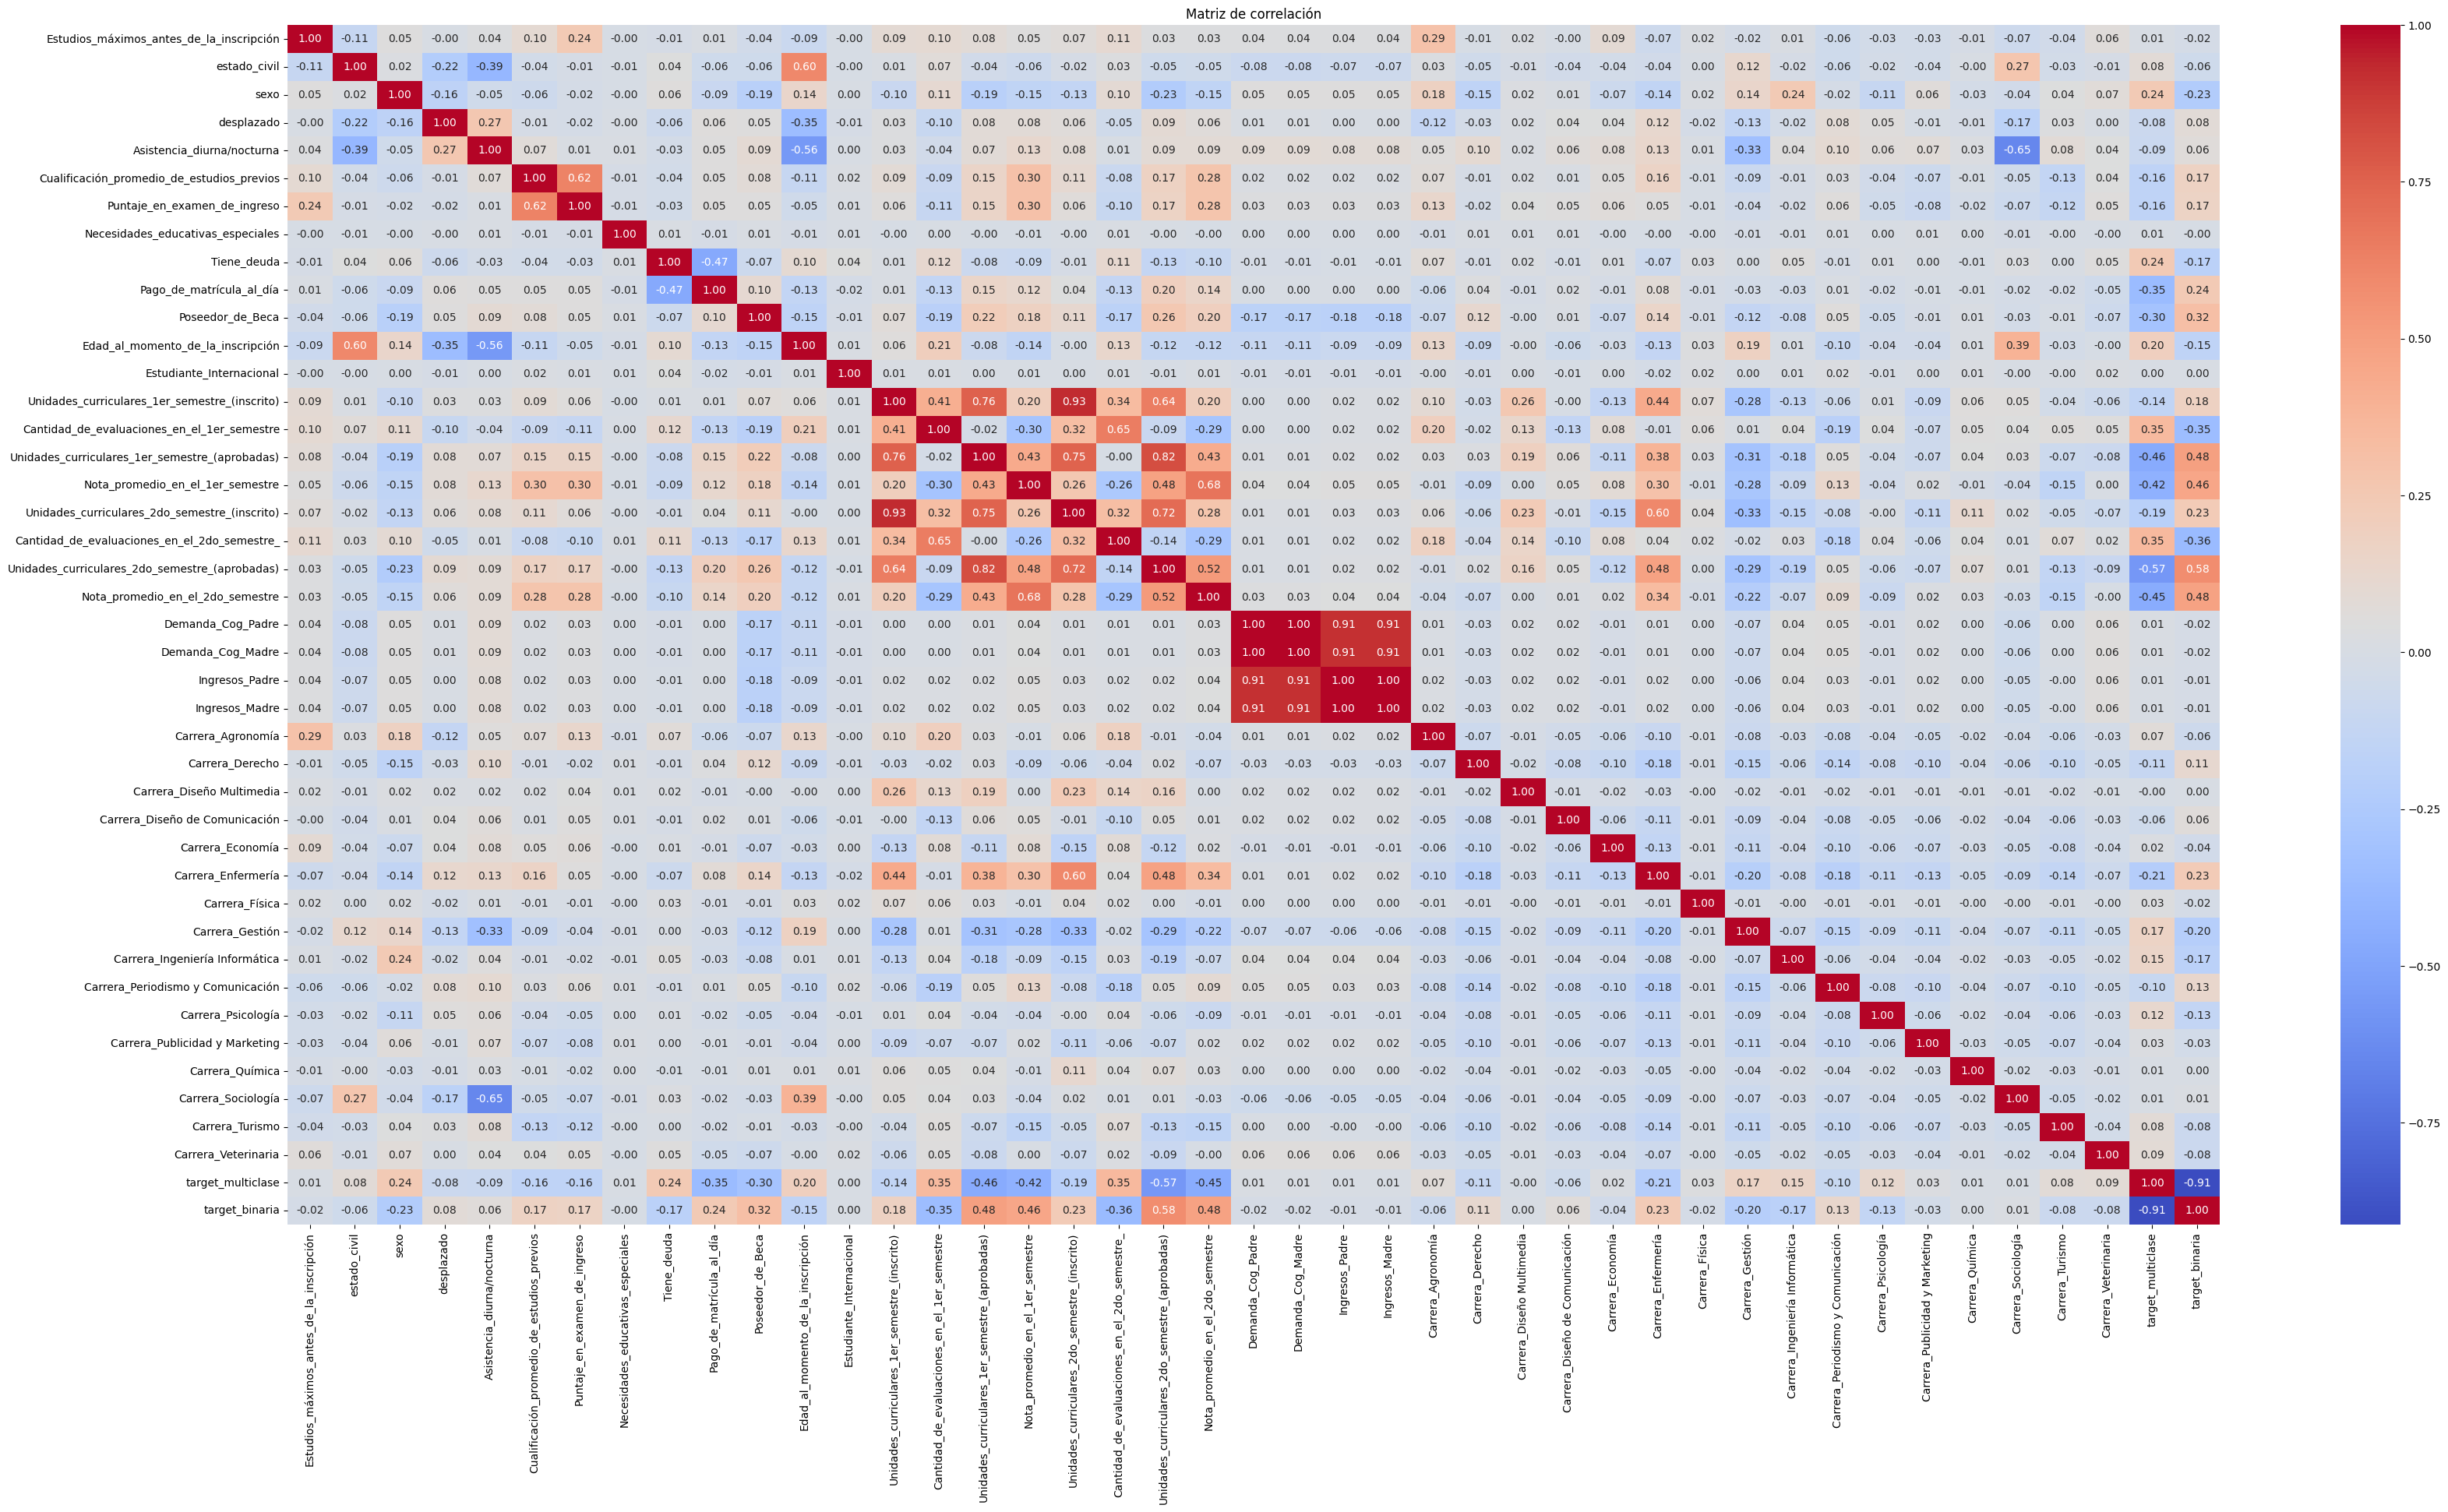

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

# Modelo binario

In [46]:
df_int_binario = df_int.drop(columns=['target_multiclase'])

In [47]:
# Separar features y target
X = df_int_binario.drop('target_binaria', axis=1)
y = df_int_binario['target_binaria']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


### Regresión logística

In [48]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo
modelo_lr = LogisticRegression(
    class_weight='balanced',
    random_state=42,
    max_iter=10000
)

# Entrenar con datos escalados
modelo_lr.fit(X_train_scaled, y_train)

# Ambas predicciones con datos escalados
y_pred = modelo_lr.predict(X_test_scaled)
y_pred_proba = modelo_lr.predict_proba(X_test_scaled)


Accuracy: 0.8519

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4365
           1       0.89      0.87      0.88      7137

    accuracy                           0.85     11502
   macro avg       0.84      0.85      0.84     11502
weighted avg       0.85      0.85      0.85     11502



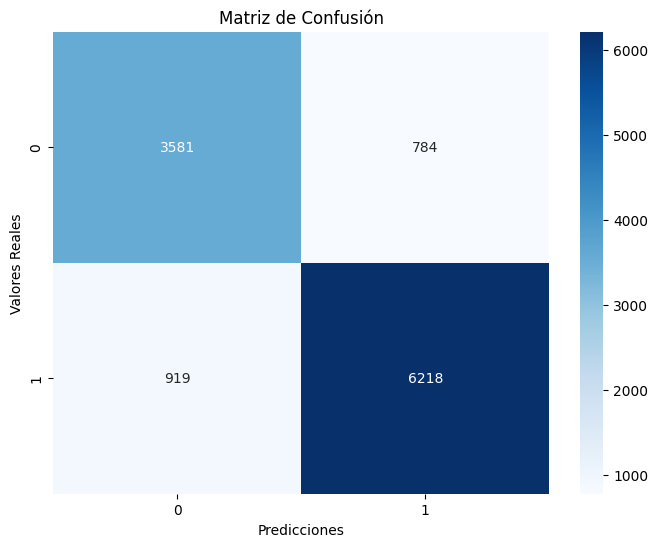

In [49]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()


In [50]:
# Obtener los coeficientes del modelo
coeficientes = modelo_lr.coef_  # o modelo_lr según cuál uses
feature_names = X_train.columns

# Para multiclase, tenemos coeficientes para cada clase
n_classes = len(modelo_lr.classes_)
print(f"Clases: {modelo_lr.classes_}")
print(f"Shape coeficientes: {coeficientes.shape}")

# Calcular importancia absoluta promedio
importancia_abs = np.mean(np.abs(coeficientes), axis=0)

# Crear DataFrame con importancias
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importancia_abs
}).sort_values('importance', ascending=False)

print("\nTop Features más importantes:")
print(feature_importance_df.head(50))

Clases: [0 1]
Shape coeficientes: (1, 41)

Top Features más importantes:
                                           feature  importance
19  Unidades_curriculares_2do_semestre_(aprobadas)    1.477590
15  Unidades_curriculares_1er_semestre_(aprobadas)    0.743379
17   Unidades_curriculares_2do_semestre_(inscrito)    0.600794
9                         Pago_de_matrícula_al_día    0.489162
20                Nota_promedio_en_el_2do_semestre    0.422675
10                                Poseedor_de_Beca    0.370435
13   Unidades_curriculares_1er_semestre_(inscrito)    0.349601
18    Cantidad_de_evaluaciones_en_el_2do_semestre_    0.300134
16                Nota_promedio_en_el_1er_semestre    0.295537
26                                 Carrera_Derecho    0.292029
33                  Carrera_Ingeniería Informática    0.256290
35                              Carrera_Psicología    0.216918
14     Cantidad_de_evaluaciones_en_el_1er_semestre    0.209818
8                                      Tiene_

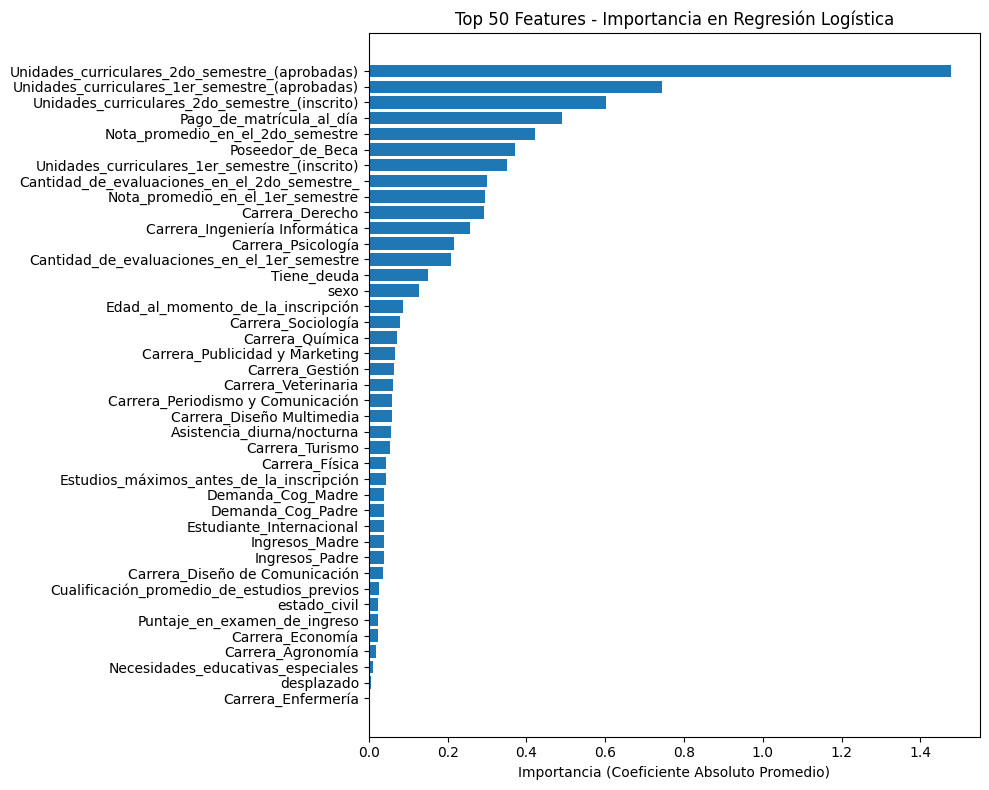

In [51]:
# Plot de las top features
plt.figure(figsize=(10, 8))
top_features = feature_importance_df.head(50)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importancia (Coeficiente Absoluto Promedio)')
plt.title('Top 50 Features - Importancia en Regresión Logística')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### smote, para manejo de desvalance


Accuracy con SMOTE: 0.8523

Reporte de Clasificación con SMOTE:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4365
           1       0.89      0.87      0.88      7137

    accuracy                           0.85     11502
   macro avg       0.84      0.85      0.84     11502
weighted avg       0.85      0.85      0.85     11502



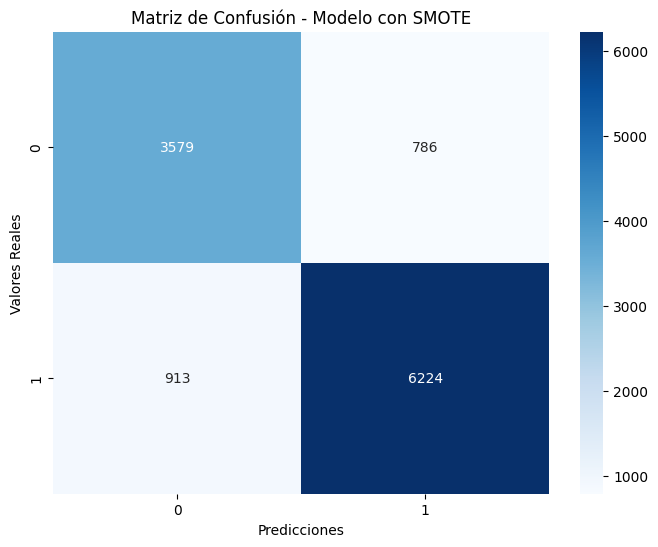

In [52]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# 1. Escalar los datos ANTES de SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Aplicar SMOTE a los datos escalados
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# 3. Entrenar modelo
modelo_lr_smote = LogisticRegression(
    random_state=42,
    max_iter=10000  # Mantener el valor actual
)

modelo_lr_smote.fit(X_train_smote, y_train_smote)

# 4. Predicciones (usar datos escalados)
y_pred_smote = modelo_lr_smote.predict(X_test_scaled)
y_pred_proba_smote = modelo_lr_smote.predict_proba(X_test_scaled)

# Evaluación
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"\nAccuracy con SMOTE: {accuracy_smote:.4f}")

print("\nReporte de Clasificación con SMOTE:")
print(classification_report(y_test, y_pred_smote))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Modelo con SMOTE')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

### Máquina de vectores de soporte (SVM) 

In [54]:
from sklearn.svm import SVC

# Crea el modelo SVM sin SMOTEs
modelo_svm = SVC(kernel='linear', C=1, random_state=42)

# Entrenar el modelo con los datos de train escalados
modelo_svm.fit(X_train_scaled, y_train)

# Predicciones
y_pred_svm = modelo_svm.predict(X_test_scaled)



Accuracy SVM: 0.8583
Accuracy de la clasificación: 85.19%

Reporte de Clasificación SVM:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      4365
           1       0.86      0.92      0.89      7137

    accuracy                           0.86     11502
   macro avg       0.86      0.84      0.85     11502
weighted avg       0.86      0.86      0.86     11502



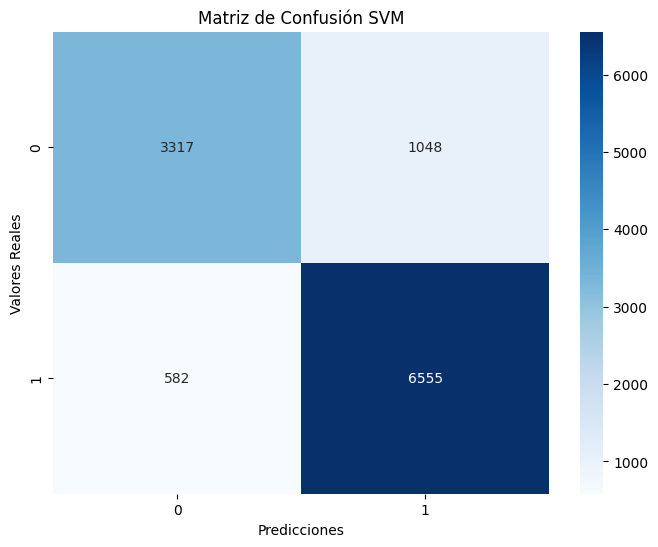

In [55]:
# --- Evaluación SVM sin SMOTE ---
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy SVM: {accuracy_svm:.4f}")
print("Accuracy de la clasificación: {:.2f}%".format(accuracy * 100))

print("\nReporte de Clasificación SVM:")
print(classification_report(y_test, y_pred_svm))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión SVM')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

In [56]:
from sklearn.svm import SVC

# Crear el modelo SVM con smote
# SVM con SMOTE
modelo_svm_smote = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True,
    random_state=42
)
modelo_svm_smote.fit(X_train_smote, y_train_smote)
y_pred_svm_smote = modelo_svm_smote.predict(X_test_scaled)
y_pred_svm_smote_proba = modelo_svm_smote.predict_proba(X_test_scaled)


Accuracy SVM con SMOTE: 0.8541

Reporte de Clasificación SVM con SMOTE:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      4365
           1       0.88      0.88      0.88      7137

    accuracy                           0.85     11502
   macro avg       0.85      0.84      0.84     11502
weighted avg       0.85      0.85      0.85     11502



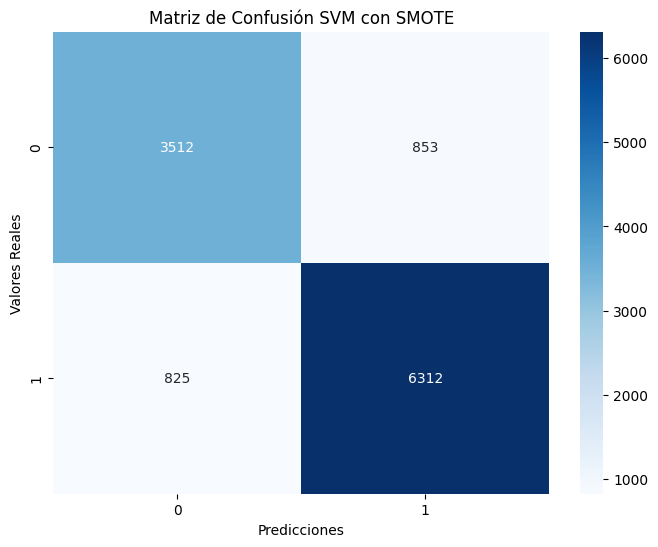

In [57]:
#Evaluacion matriz confusion SVM con SMOTE
accuracy_svm_smote = accuracy_score(y_test, y_pred_svm_smote)
print(f"\nAccuracy SVM con SMOTE: {accuracy_svm_smote:.4f}")

print("\nReporte de Clasificación SVM con SMOTE:")
print(classification_report(y_test, y_pred_svm_smote))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm_svm_smote = confusion_matrix(y_test, y_pred_svm_smote)
sns.heatmap(cm_svm_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión SVM con SMOTE')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

### Árboles de Decisión 


In [66]:
#Modelo Random forest sin smote
### Random Forest sin SMOTE     
from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
modelo_rf.fit(X_train_scaled, y_train)
y_pred_rf = modelo_rf.predict(X_test_scaled)    
#Evaluacion matriz confusion Random Forest sin SMOTE
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy Random Forest: {accuracy_rf:.4f}")


Accuracy Random Forest: 0.8590


Accuracy de la clasificación: 85.90%

Reporte de Clasificación Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.77      0.81      4365
           1       0.87      0.91      0.89      7137

    accuracy                           0.86     11502
   macro avg       0.86      0.84      0.85     11502
weighted avg       0.86      0.86      0.86     11502



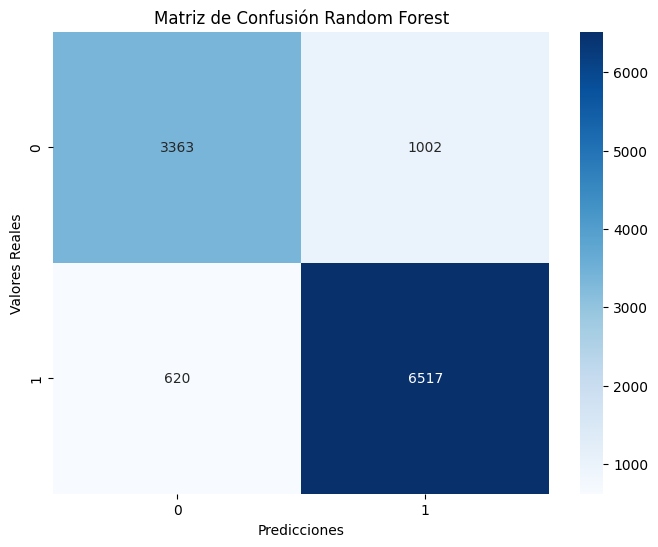

In [67]:
#Accuracy RF sin smote
print("Accuracy de la clasificación: {:.2f}%".format(accuracy_rf * 100))

#matriz de confusion RF sin smote
print("\nReporte de Clasificación Random Forest:")  
print(classification_report(y_test, y_pred_rf))
# Matriz de confusión
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión Random Forest')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()


In [64]:
#Generar modelo con random forest
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=6,
    random_state=42
)

modelo_rf.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = modelo_rf.predict(X_test_scaled)    



Accuracy RF con SMOTE: 0.8475

Reporte de Clasificación RF con SMOTE:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      4365
           1       0.87      0.88      0.88      7137

    accuracy                           0.85     11502
   macro avg       0.84      0.84      0.84     11502
weighted avg       0.85      0.85      0.85     11502

Accuracy de la clasificación: 84.75%


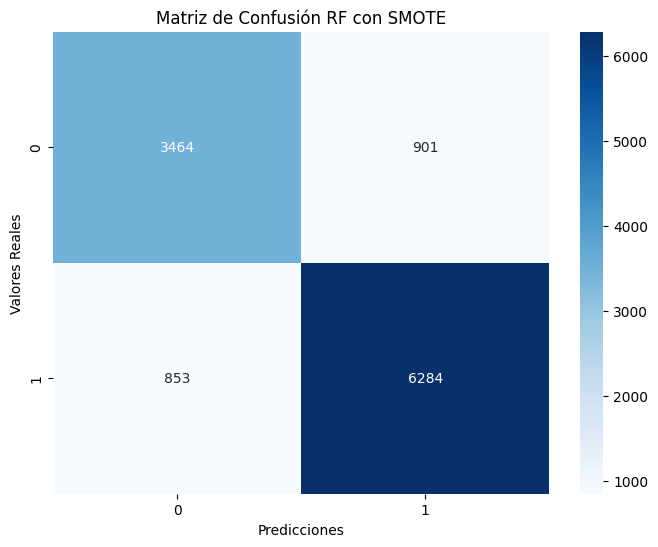

In [65]:
#Accuracy RF con SMOTE
accuracy_rf = accuracy_score(y_test, y_pred_rf_smote)
print(f"\nAccuracy RF con SMOTE: {accuracy_rf:.4f}")

#reporte de clasificación RF con SMOTE
print("\nReporte de Clasificación RF con SMOTE:")
print(classification_report(y_test, y_pred_rf_smote))
print("Accuracy de la clasificación: {:.2f}%".format(accuracy_rf * 100))

#matriz de confusión RF con SMOTE
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf_smote    )
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión RF con SMOTE')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

## Optuna para RF sin SMOTE

In [71]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    # Definimos el espacio de búsqueda de hiperparámetros
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 2, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    
    # Definir el modelo
    modelo = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )
    
    # Entrenar con los datos escalados sin SMOTE
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    
    # Calcular accuracy
    acc = accuracy_score(y_test, y_pred)
    return acc

# Crear el estudio
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)  # podés subir n_trials (ej: 100) si tenés tiempo

# Mostrar los mejores parámetros y el mejor score
print("Mejores hiperparámetros:", study.best_params)
print("Mejor accuracy:", study.best_value)


[I 2025-10-02 17:28:56,898] A new study created in memory with name: no-name-52037336-901b-4ff7-a50a-752ca16a0db7
[I 2025-10-02 17:29:00,255] Trial 0 finished with value: 0.8548078595026952 and parameters: {'n_estimators': 209, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.8548078595026952.
[I 2025-10-02 17:29:06,789] Trial 1 finished with value: 0.8542862110937228 and parameters: {'n_estimators': 79, 'max_depth': 20, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 0.8548078595026952.
[I 2025-10-02 17:29:29,059] Trial 2 finished with value: 0.8534167970787689 and parameters: {'n_estimators': 293, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 0 with value: 0.8548078595026952.
[I 2025-10-02 17:29:32,526] Trial 3 finished with value: 0.8524604416623196 and parameters: {'n_estimators': 244, 'max_depth': 10, 'min_

Mejores hiperparámetros: {'n_estimators': 196, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Mejor accuracy: 0.8608068162058773


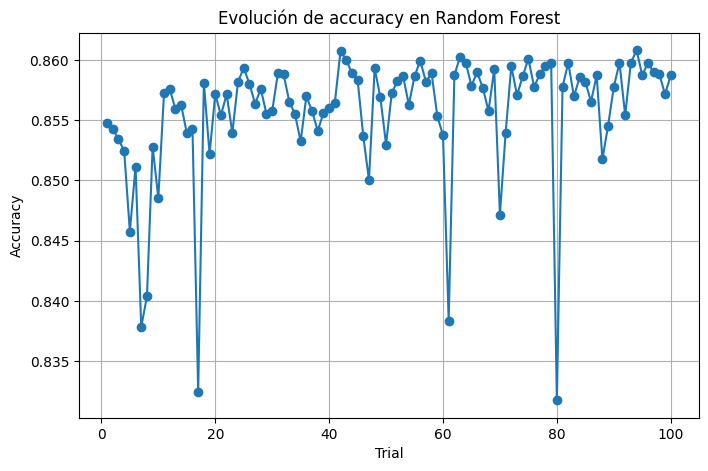

In [72]:
import matplotlib.pyplot as plt

# Extraer los valores de accuracy de cada trial
accuracies = [t.value for t in study.trials]

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(accuracies)+1), accuracies, marker='o')
plt.title("Evolución de accuracy en Random Forest")
plt.xlabel("Trial")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
